# **Computer vision** 

### what is CNN

## 0. comuter vision libaries in pytorch 

* `torchvision.datasets` -get the datasets and data loading function for computer vision
* `torchvision.models` -get pretrained computer vision mmoels that you can leaverage for your own problem
* `torchvision.transforms` - function for manipulating your vision data (images) to be suitabe for use with an ML model
* `torch.utils.data.Datasets` -Base datast class for pytorch
* `torch.utils.data.DataLoader` -creates a python irteable over a dataset 

In [1]:
# import pytorch 
import torch
from torch import nn

# import torchvision 
import torchvision 
from torchvision import datasets 
from torchvision import transforms 
from torchvision.transforms import ToTensor 

# import matplotlib
import matplotlib.pyplot as plt

# check version 
print(torch.__version__)
print(torchvision.__version__)


/home/anubhav/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


2.3.0+cu121
0.18.0+cu121


### getting a computer vision dataset and checking
* the dataset is MNIST dataset from torchvision.dataset

In [2]:
#setup
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root ='image_data', # where to download data to ?
    train =True,# do we want the training datasets?
    download =True, # do we want to dowload yes/no?
    transform =torchvision.transforms.ToTensor(), # how do we want to transform the data? 
    target_transform =None # how to we transform the labels / targets
)

test_data = datasets.FashionMNIST(
    root ='image_data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform =None 
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
# see the first training example 
image ,label = train_data[0]
image ,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx

In [7]:
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape # {color_channle, height ,width }

torch.Size([1, 28, 28])

### 1.2 visualising our data


In [10]:
image ,label =train_data[0]
print(f'image{image}')


imagetensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.

Text(0.5, 1.0, 'boot')

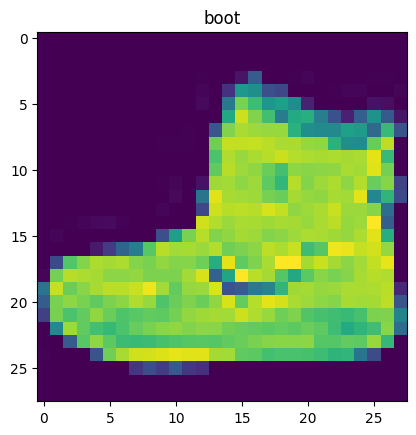

In [11]:
plt.imshow(image.squeeze())
plt.title('boot')

(-0.5, 27.5, 27.5, -0.5)

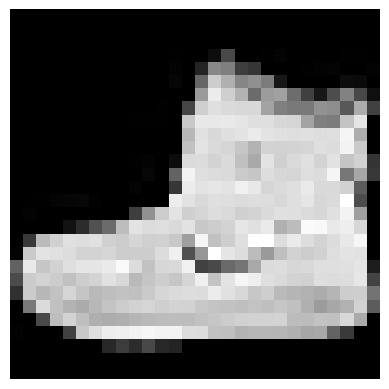

In [12]:
plt.imshow(image.squeeze() , cmap ='gray')
plt.axis(False)

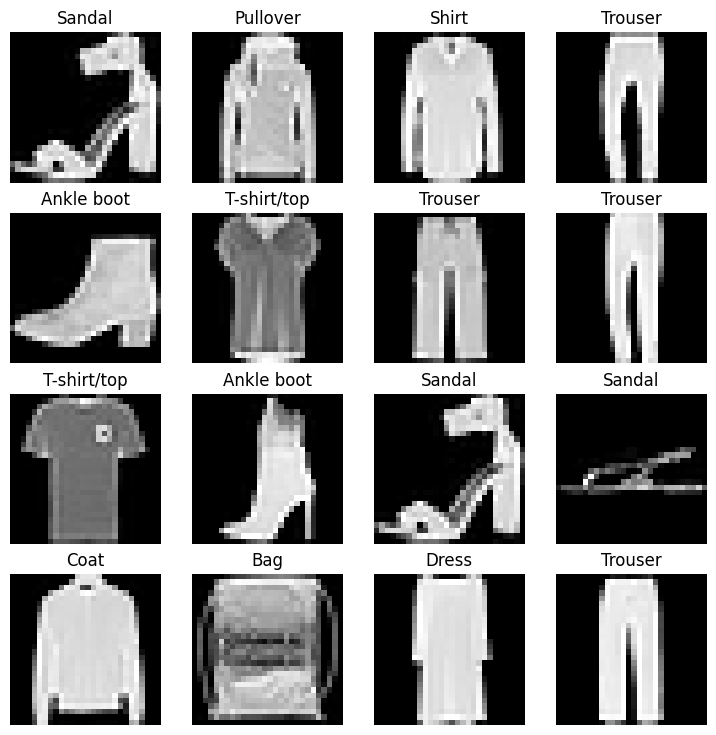

In [13]:
## plot more image 
# torch.manual_seed(42)
fig = plt.figure(figsize =(9,9))
row ,cols =4,4
for i in range(1,row*cols+1):
    random_idx =torch.randint(0,len(train_data),size=[1]).item()
    img , label = train_data[random_idx]
    fig.add_subplot(row ,cols ,i)
    plt.imshow(img.squeeze(),cmap = 'gray')
    plt.title(class_name[label])
    plt.axis(False)

Do you think items of clothing image could be modelled with pure line ? Or do you think will need 
non-linearity 

## 2. prepare DataLoder
* Right now, our data is in the form of Python Datasets

* DataLOader turns our datasets into a python iterable 

* MOre specigically we want to turn our data into batches (or-minibatches)
  1. It is more computainally efficient as in your computing hardware may no tbe ablre to look (in memory) at 6000 image in one hit. SO we break it down to 32 images at a time (batch size of 32)
  2. it gives our neural more chances to udate its gradients per epoch

In [14]:
train_data ,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: image_data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: image_data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [15]:
from torch.utils.data import DataLoader
batch_size =32
train_dataloader = DataLoader(dataset = train_data,
                             batch_size =batch_size,
                             shuffle= True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size =batch_size,
                             shuffle= False)

train_dataloader ,test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7b86303ae7a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b86303ae590>)

In [16]:
## let's check out what what we'ev created
print(f'dataloader: {train_dataloader ,test_dataloader} batches {batch_size}')
print(f'length  of the train_dataloader :{len(train_dataloader)} batches of {batch_size}')
print(f'length  of the test_dataloader :{len(test_dataloader)} batches of {batch_size}')

dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7b86303ae7a0>, <torch.utils.data.dataloader.DataLoader object at 0x7b86303ae590>) batches 32
length  of the train_dataloader :1875 batches of 32
length  of the test_dataloader :313 batches of 32


In [17]:
# check out what's inside the trainig  dataloader 
train_features_batches ,train_labels_batch = next(iter(train_dataloader))
train_features_batches.shape ,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])


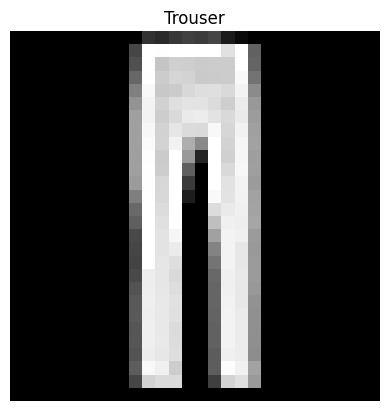

In [18]:
# show a sample 
torch.manual_seed(42)
random_idx =torch.randint(0,len(train_features_batches),size=[1]).item()
image,label =train_features_batches[random_idx],train_labels_batch[random_idx]
plt.imshow(image.squeeze(),cmap ='gray')
plt.title(class_name[label])
plt.axis(False)
print(image.shape)

## 3. model 0: Build a basline model 
when starting to building a series of a machine modelling experiment i's best practice to start with a baseline model you will try and improve upon with subsequent models/ experiment 


In [19]:
## create a flatten layer
flatten_model = nn.Flatten()

In [20]:
# get a single sample
X = train_features_batches[0]
X

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0314, 0.3961, 0.2471, 0.2196, 0.4627, 0.4510, 0.1922,
          0.3020, 0.4863, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0784,
          0.1686, 0.0471, 0.6275, 0.7216, 0.7020, 0.9765, 1.0000, 0.6824,
          0.9294, 0.6392, 0.0314, 0.2157, 0.1686, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.1412, 0.1412,
          0.1059, 0.0471, 0.0196, 0.4784, 0.6588, 0.5922, 0.6314, 0.7137,
          0.4118, 0.0000, 0.0314, 0.0706, 0.1333, 0.1922, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1412, 0.1216, 0.0588,
          0.0980, 0.1059, 0.0235, 0.0000, 0.1451, 0.3569, 0.2941, 0.0471,
          0.0000, 0.0471, 0.0980, 0.0706, 0.0510, 0.1608,

In [21]:
# flatten the sample 
output = flatten_model(X) # perform forward pass

# print out what happened 
print(f'shape before flattening: {X.shape}')
print(f'shape after flattening : {output.shape}')

shape before flattening: torch.Size([1, 28, 28])
shape after flattening : torch.Size([1, 784])


In [22]:
from torch import nn
class FaishonMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape:int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack =nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape),
        )
    def forward(self,X):
        return self.layer_stack(X)

torch.manual_seed(42)
model_0 = FaishonMNISTModelV0(input_shape= 784 ,# 28*28,
                             hidden_units= 10,
                              output_shape = len(class_name) # one for every class
                             )
model_0

FaishonMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 setup loss , optimizer and evaluation 
* loss function - since we're working with multi-class our loss function will ne `nn.CrossEntropy`
* OPtimizer = our optimizer `torch.optim.SGD()`

In [25]:
# import accuracy metric 
from helper_functions import accuracy_fn
# set up loss and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.1)

### 3.2 function to time our experiment model 
Machine learning is vary experimental 
1. model's performence loss and accuracy values
2. how fast it runs 

In [26]:
from timeit import default_timer as  timer 
def print_train_time(start:float,
                    end:float,
                    device :torch.device =None):
    total_time = end-start
    print(f'train time on {device} : {total_time:.3f} second')
    return total_time
    

In [27]:
start_time = timer()
# some code 
end_time =timer()
print_train_time(start =start_time ,end =end_time,device ='cpu')

train time on cpu : 0.000 second


3.7384999998835156e-05

### createing a training  loop  aand  taining a model on batches of data
1. loop through epochs
2. Loop through tranining batches perform training setp , caculate the train loss per batch
3. loop through testing batches perform testing step, calculate the test loss per batch
4. print out what's happining
5. time it all(for fun)


In [28]:
# import tqdm for progress bar 
from tqdm.auto import tqdm 

# set the seed and start the timer 
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set he number of epochs (we'll keep this samll for faster training time )
epochs =3

# creates training and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\------')
    ## training 
    train_loss = 0 
    ## add a loop to loop through the rtraining batches 
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1. forward pass
        y_pred = model_0(X)

        # 2. calculate loss (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss # acumulate the train loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch %400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')
    # divide total train los by length of train dataloader 
    train_loss/= len(train_dataloader)
    #### testing loop
    test_loss ,test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. forward pass
            test_pred = model_0(X)

            # calculate the loss
            test_loss += loss_fn(test_pred,y)
            # calculate the acccuracy
            test_acc += accuracy_fn(y_true = y ,y_pred = test_pred.argmax(dim=1))
        #calculate the test loss average per batch 
        test_loss/= len(test_dataloader)

        # calculate the 
        test_acc /= len(test_dataloader)
    # print out what happining 
    print(f'\n train loss : {train_loss:.4f} | test loss{test_loss:.4f} | test_acc {test_acc:.4f} ')
# calculate training time 
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                           end = train_time_end_on_cpu,
                                           device =str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0\------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 train loss : 0.5904 | test loss0.5095 | test_acc 82.0387 
Epoch: 1\------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 train loss : 0.4763 | test loss0.4799 | test_acc 83.1969 
Epoch: 2\------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 train loss : 0.4550 | test loss0.4766 | test_acc 83.4265 
train time on cpu : 119.132 second


In [29]:
next(model_0.parameters()).device

device(type='cpu')

### 4  make predictions and get model_0 result 

In [30]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device ):
    loss,acc = 0 ,0
    model.eval()
    with torch.inference_mode():
        for X, y  in tqdm(data_loader):
            X,y = X.to(device) ,y.to(device)
            
            y_pred =model(X)

            # accumulate the loss and acc 
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true = y,
                              y_pred = y_pred.argmax(dim =1))

        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name ":model.__class__.__name__,
           'model_loss':loss.item(),
           'model_acc': acc}





In [31]:
model_0_result = eval_model(model_0,
                           data_loader = test_dataloader,
                           loss_fn = loss_fn,
                           accuracy_fn= accuracy_fn,
                           device = 'cpu')

  0%|          | 0/313 [00:00<?, ?it/s]

In [32]:
model_0_result

{'model_name ': 'FaishonMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 5. setup device agostic code 

In [33]:
!nvidia-smi

Sun Jun  2 09:44:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8               5W /  35W |     10MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [34]:
torch.cuda.is_available()

True

In [35]:
# setup device agnostic code
import torch
device = 'cuda' if   torch.cuda.is_available() else 'cpu'


In [36]:
device

'cuda'

### 6. MOdel 1 : build a better model with non-linearity 

We learned about the power of non-linearity in notebook 2 

In [37]:
# create a model with non-linear and linear layer
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape :int,
                hidden_units :int ,
                output_shape : int):
        super().__init__()
        self.layer_stack= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape , out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units , out_features = output_shape),
            nn.ReLU()
                        )
    def forward(self,x:torch.Tensor):
         return self.layer_stack(x)

In [38]:
next(model_0.parameters()).device

device(type='cpu')

In [39]:
# create an instance of model_1 
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after the 28*28
                            hidden_units= 10,
                            output_shape=len(class_name)).to(device)

next(model_1.parameters()).device


device(type='cuda', index=0)

In [40]:
### setup loss and optimixer function 

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr =0.1)
                            

### 6.2 functionizing training and evaluation/testing loops 
* function for training `train_step()`
* testing loop `testing_step()`

In [41]:
def train_step(model : torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device : torch.device = device):
    train_loss ,train_acc = 0,0
    model.to(device)
    ## add a loop to loop through the training batches 
    for batch,(X,y) in enumerate(data_loader):
        model.train()
        
        # put data on target device 
        X,y = X.to(device) ,y.to(device)
        # 1. forward pass
        y_pred = model(X)

        # 2. calculate loss (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss # acumulate the train loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred =y_pred.argmax(dim=1))
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch %400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')
    # divide total train los by length of train dataloader 
    train_loss/= len(data_loader)
    train_acc/= len(data_loader)
    print(f'train loss :{train_loss:.3f} | train_acc: {train_acc:.2f}')

In [42]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):
    # put the model in eval mode
    test_loss ,test_acc = 0,0
    model.eval()
    with torch.inference_mode(): 
        for X, y in test_dataloader:
            X,y = X.to(device) ,y.to(device)
            
            # 1. forward pass
            test_pred = model(X)

            # calculate the loss
            test_loss += loss_fn(test_pred,y)
            # calculate the acccuracy
            test_acc += accuracy_fn(y_true = y ,y_pred = test_pred.argmax(dim=1))
        #calculate the test loss average per batch 
        test_loss/= len(data_loader)

        # calculate the 
        test_acc /= len(data_loader)
    # print out what happining 
    print(f'\n train loss : {train_loss:.4f} | test loss{test_acc:.4f} ')

In [43]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu =timer()

epochs =3

for epoch in tqdm(range(epochs)):
    print(f'epochas :{epoch}\n---')
    train_step(model =model_1,
              data_loader= train_dataloader,
              loss_fn = loss_fn,
              optimizer= optimizer,
              accuracy_fn = accuracy_fn,
              device =device)
    test_step(model =model_1,
              data_loader= train_dataloader,
              loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             device =device
             )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start =train_time_start_on_gpu,
                                           end =train_time_end_on_gpu,
                                           device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

epochas :0
---
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
train loss :1.092 | train_acc: 61.34

 train loss : 0.4550 | test loss10.8500 
epochas :1
---
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
train loss :0.781 | train_acc: 71.93

 train loss : 0.4550 | test loss12.3383 
epochas :2
---
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
train loss :0.670 | train_acc: 75.94

 train loss : 0.4550 | test loss12.5233 
train time on cuda : 34.655 second


In [44]:
model_0_result

{'model_name ': 'FaishonMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [45]:
total_train_time_model_0

119.13210202699999

In [46]:
# get model_1 result dictionary 
model_1_results = eval_model(model = model_1,
                            data_loader =test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn=accuracy_fn,
                            device = device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [47]:
model_1_results

{'model_name ': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

# CNN

## model 2. building a convolutional neural network (cnn)


In [48]:
## create a convolutional neural network 
class FaishionMNISTV2(nn.Module):
    """
    model architecture that replicates the TinyVGG
    model from CNN explainer website
    """
    def __init__(self,input_shape:int ,hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride =1 ,
                     padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride =1 ,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride =1,
                     padding =1 ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size =2 )
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                     out_features= output_shape)
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

In [49]:
torch.manual_seed(42)
model_2 = FaishionMNISTV2(input_shape=1,
                         hidden_units=10,
                         output_shape = len(class_name)).to(device)

### strpping the conv2d()
* padding : 

In [50]:
torch.manual_seed(42)

#create a batch of images 
images = torch.randn(size =(32,3,64,64))
test_image = images[0]

In [51]:
images.shape ,test_image.shape 

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [52]:
torch.manual_seed(42)
# create a single conv2d layer 
conv_layer = nn.Conv2d(in_channels =3,
                      out_channels =10,
                      kernel_size =(5,5),
                      stride = 1,
                      padding = 1)
# pass the datathrough the convolution layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [53]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [54]:
torch.__version__

'2.3.0+cu121'

## 7.2 stepping through `nn.maxpool2d()` 


In [55]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [56]:
# print out the original shape without unsqueeze dimenssion
print(f'test image original shape : {test_image.shape}')
print(f'test image with insqueeze dimesnion :{test_image.unsqueeze(0).shape}')

test image original shape : torch.Size([3, 64, 64])
test image with insqueeze dimesnion :torch.Size([1, 3, 64, 64])


In [57]:
## create a sample nn.MaxPool2d layer 
max_pool_layer = nn.MaxPool2d(kernel_size =2)

# pass  the data through just conv_layer 
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'shape after going through cov_layer() : {test_image_through_conv.shape}')

# pass data through the max pool layer 
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'shape after going thrugh mx_pool layer {test_image_through_conv_and_max_pool.shape}')

shape after going through cov_layer() : torch.Size([1, 10, 62, 62])
shape after going thrugh mx_pool layer torch.Size([1, 10, 31, 31])


In [58]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimesnions to our images 
random_tensor = torch.randn(size=(1,1,2,2))
print(f'random tensor {random_tensor}')
print(f'random tensor shape  {random_tensor.shape}')

# create a  max pool layer 
max_pool_layer = nn.MaxPool2d(kernel_size= 2)

# pass the random  tenso rthrough the max_pool layer 
max_pool_tensor =max_pool_layer(random_tensor)
print(f'\nMaxpooltensor {max_pool_tensor}')
print(f'max pool tensor shape {max_pool_tensor.shape}')

random tensor tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape  torch.Size([1, 1, 2, 2])

Maxpooltensor tensor([[[[0.3367]]]])
max pool tensor shape torch.Size([1, 1, 1, 1])


Text(0.5, 1.0, 'T-shirt/top')

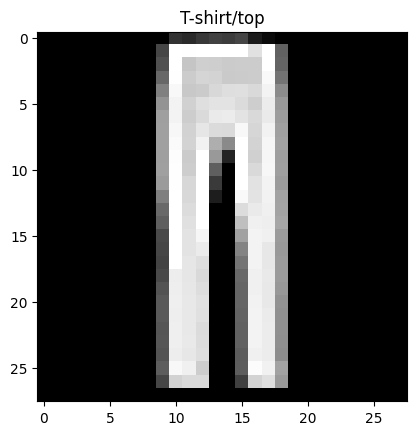

In [59]:
plt.imshow(image.squeeze(),cmap = 'gray')
plt.title(class_name[0])

In [60]:
rand_image = torch.randn(size=(1,28,28))
rand_image.shape

torch.Size([1, 28, 28])

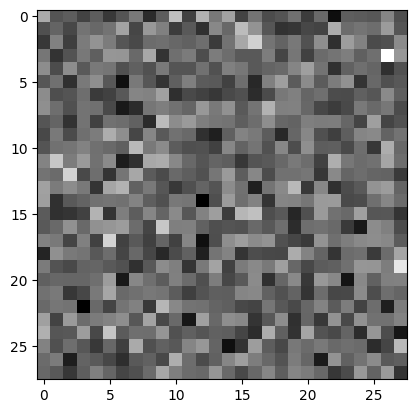

In [61]:
plt.imshow(rand_image.squeeze(),cmap = 'gray')


In [62]:
model_2(rand_image.unsqueeze(dim =0).to(device))

tensor([[-0.1664,  0.0243, -0.0136, -0.0716,  0.0500, -0.0466,  0.0950, -0.0307,
         -0.0431,  0.1579]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 setup a loss function and optimizer  for moedl_2 


In [63]:
# setup loss function /eval metrics optimizer 
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr =0.1)

### 7.4 trainig and testing `model_2` using our training and testing functions 

In [64]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure the time 
from timeit import default_timer as timer 
train_time_start_model_2 =timer()

# traning and testing 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'epochs {epoch}-----')
    train_step(model = model_2,
              data_loader= train_dataloader,
              loss_fn = loss_fn,
              optimizer = optimizer,
              accuracy_fn = accuracy_fn,
              device = device)
    test_step(model = model_2,
             data_loader = test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             device = device)

train_time_end_model_2 =timer()
total_train_time_model_2 =print_train_time(start =train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device =device)

  0%|          | 0/3 [00:00<?, ?it/s]

epochs 0-----


/home/anubhav/.local/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
train loss :0.558 | train_acc: 80.21

 train loss : 0.4550 | test loss85.9225 
epochs 1-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
train loss :0.361 | train_acc: 86.97

 train loss : 0.4550 | test loss87.9892 
epochs 2-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
train loss :0.322 | train_acc: 88.54

 train loss : 0.4550 | test loss88.3187 
train time on cuda : 42.878 second


In [65]:
# get the model result 
model_2_results = eval_model(
    model =model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn= accuracy_fn,
    device =device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name ': 'FaishionMNISTV2',
 'model_loss': 0.32523924112319946,
 'model_acc': 88.31869009584665}

### 8. comparing the result and training time 


In [66]:
import pandas as pd
compare_results =pd.DataFrame([model_0_result,
                            model_1_results,
                            model_2_results])

In [67]:
compare_results

,model_name,model_loss,model_acc
0,FaishonMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FaishionMNISTV2,0.325239,88.318690


In [68]:
### adding time to result comaprision 
compare_results['training time'] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]

In [69]:
import pandas as pd

# Sample data
data = {
    'model_name': ['FaishonMNISTModelV0', 'FashionMNISTModelV1', 'FaishionMNISTV2'],
    'model_loss': [0.476639, 0.685001, 0.326154],
    'model_acc': [83.426518, 75.019968, 88.588259],
    'training_time': [23.119172, 23.305202, 32.488061]
}

# Create DataFrame
compare_results = pd.DataFrame(data)
compare_results

,model_name,model_loss,model_acc,training_time
0,FaishonMNISTModelV0,0.476639,83.426518,23.119172
1,FashionMNISTModelV1,0.685001,75.019968,23.305202
2,FaishionMNISTV2,0.326154,88.588259,32.488061


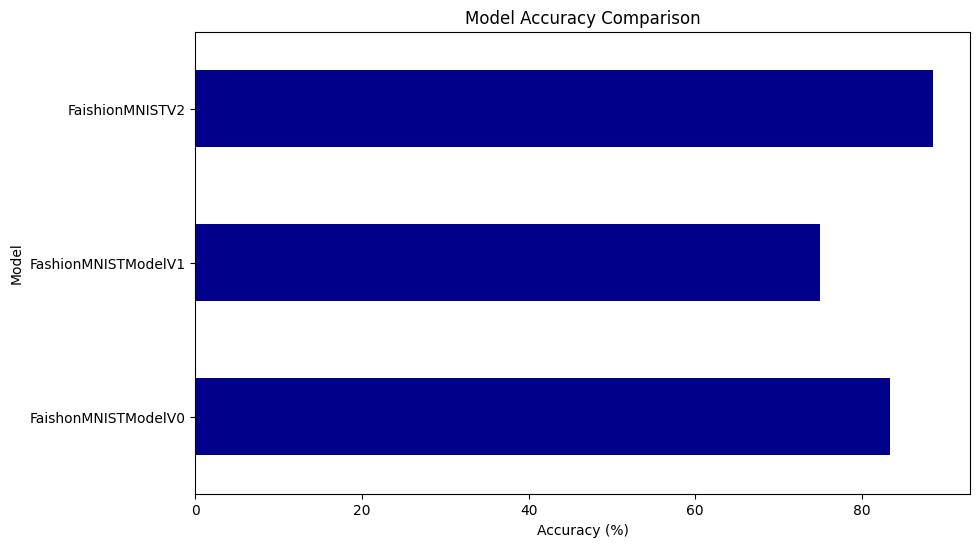

In [70]:
import matplotlib.pyplot as plt

# Plot model accuracies
plt.figure(figsize=(10, 6))
compare_results.set_index('model_name')['model_acc'].plot(kind='barh', color='darkblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.show()


### 9. make and eval random prediction withthe best model 


In [71]:
def make_prediction(model:torch.nn.Module,
                   data : list,
                   device :torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dimension  and pass to the trarget device)
            sample =torch.unsqueeze(sample,dim = 0).to(device)
            # forward passs (model output raw logits )
            pred_logits =model(sample)
            # get prediction probilitity (logits->probs )
            pred_prob = torch.softmax(pred_logits.squeeze() ,dim =0)
            # get pred_probs off the GPU for the further calculation 
            pred_probs.append(pred_prob.cpu())
        # stack the pred to turn list into a tensor 
    return torch.stack(pred_probs)

In [72]:
img ,label  =test_data[0][:10]
img.shape ,label

(torch.Size([1, 28, 28]), 9)

In [73]:
import random
random.seed(42)
test_samples =[]
test_labels =[]
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape 
test_samples[0].shape
    

torch.Size([1, 28, 28])

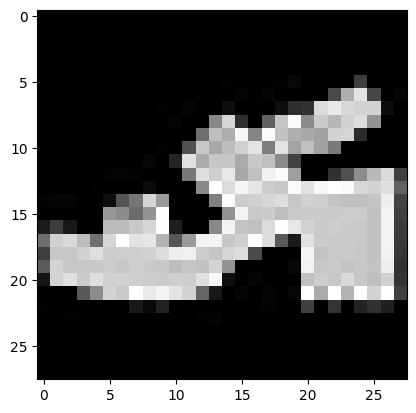

In [74]:
plt.imshow(test_samples[0].squeeze(),cmap ='gray')

In [75]:
# make prediction 
pred_probs =make_prediction(model = model_2,
                           data = test_samples)

# view first two prediction probilties
pred_probs[:2]

tensor([[7.8140e-07, 2.5071e-09, 7.0039e-08, 8.3388e-08, 7.3047e-09, 9.9986e-01,
         2.8410e-06, 1.4837e-05, 1.5328e-05, 1.0231e-04],
        [9.1353e-03, 7.1581e-01, 1.5817e-03, 2.6205e-01, 7.2846e-03, 1.1914e-04,
         2.7843e-03, 7.0671e-04, 3.6592e-04, 1.6692e-04]])

In [76]:
# convert prediction probs to labels 
pred_classes =pred_probs.argmax(dim =1)

In [77]:
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [78]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

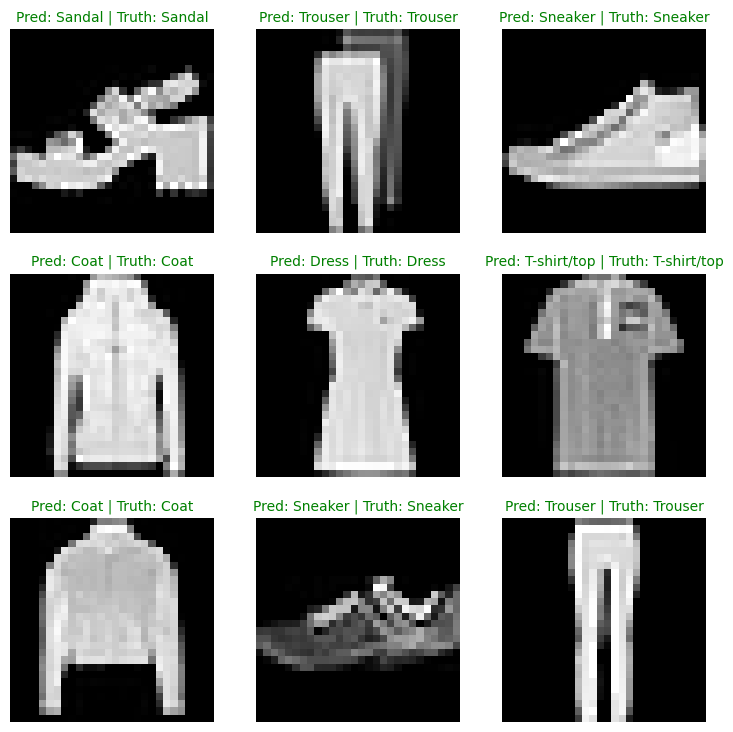

In [79]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_name[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

### 10. making a confusion matrix further prediction 
A cinfusion matrix is a best way to evalutate the model classification  model 
1. make prediction with our trained model on th test data
2. make a confusion matrix `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix using `mixtend.plotin.plot_confusion_marix()`

In [84]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 957.9 kB/s eta 0:00:00m eta 0:00:010:01:01


In [86]:
import mlxtend

In [88]:
mlxtend.__version__

'0.23.1'

In [91]:
## import the tqdm for he progress par 
from tqdm.auto import tqdm 

# make prediction wiht trained model 
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X , y  in tqdm(test_dataloader ,desc ='making prediction .....'):
        X ,y  =X.to(device) ,y.to(device)
        # do  the forward pass
        y_logits = model_2(X)
        # truth prediction from logits -> predictions probs -> prediction lables 
        y_pred = torch.softmax(y_logits.squeeze(),dim =0).argmax(dim =1)
        # put predction on cpu for evaluation 
        y_preds.append(y_pred.cpu())
    
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

making prediction .....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])

In [92]:
len(y_pred_tensor)

10000

In [99]:
# see if required package are installed and if not , install them ....
try:
    import torchmetrics , mlxtend 
    print(f'mlxtend version : {mlxtend.__version__}')
    assert int(mlxtend.__version__.split('.')[1] >= 19,'mlxtend version should we higher than 0.19.0')
except : 
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics ,mlxtend 
    print(f'{mlxtend.__version__}')

mlxtend version : 0.23.1
0.23.1


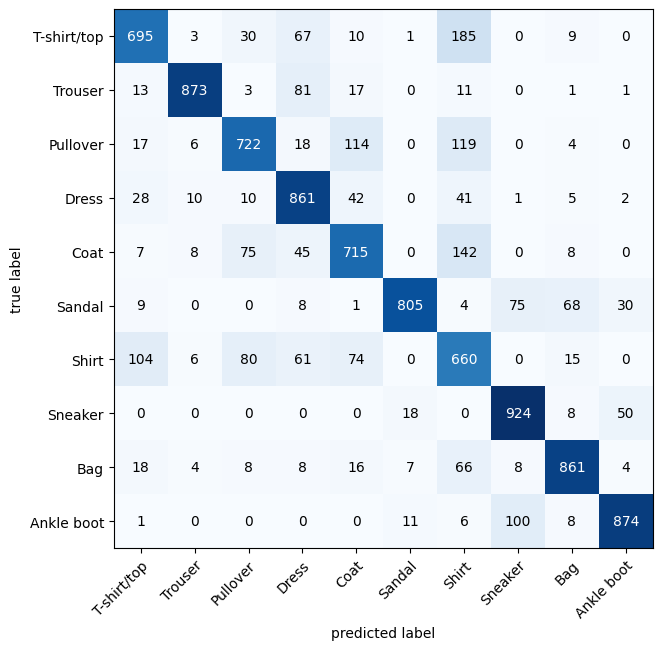

In [105]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion instrance and compare predction  to targets 
confmat = ConfusionMatrix(num_classes = len(class_name),task ='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                        targettask = test_data.targets)

# plt the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names= class_name ,
    figsize= (10,7)
)


## Saving and load our best  performing model 

In [108]:
from pathlib import Path 
# creat a model directory path 
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents =True,
                exist_ok = True)

# creata  model save
MODEL_NAME = '03_pytorch_computer_model_2.pth'
MODEL_SAVE_PATH = MODEL_PAHT/MODEL_NAME

# save the model 
print(f'saving model to {MODEL_SAVE_PATH}')
torch.save(obj = model_2.state_dict(),
          f = MODEL_SAVE_PATH )

saving model to models/03_pytorch_computer_model_2.pth


In [110]:
### create a new instance 
torch.manual_seed(42)
loaded_model_2 = FaishionMNISTV2(input_shape =1 ,
                                hidden_units= 10,
                                output_shape= len(class_name))

# load in the save state_dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send the model to the target device 
loaded_model_2.to(device)


FaishionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [111]:
model_2_results

{'model_name ': 'FaishionMNISTV2',
 'model_loss': 0.32523924112319946,
 'model_acc': 88.31869009584665}

In [113]:
# evalutea loaded model 
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn= accuracy_fn,
    device =device
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name ': 'FaishionMNISTV2',
 'model_loss': 0.32523924112319946,
 'model_acc': 88.31869009584665}

In [118]:
torch.isclose(torch.tensor(model_2_results['model_loss']),
             torch.tensor(loaded_model_2_results['model_loss']),
             atol =1e-02)

tensor(True)